# Making plots for Loopix scenario, unidirectional perspective

In [1]:
import pandas
import json
from typing import Dict
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
sns.set(rc={"figure.figsize":(6, 5)}) 

mpl.rcParams['figure.dpi'] = 100

sns.color_palette("Set2")

sns.set(font_scale=1.1, style='whitegrid')

In [4]:
pal = sns.color_palette(
    ["#4477AA", "#EE6677", "#228833", "#CCBB44", "#66CCEE", "#AA3377", "#BBBBBB"]
)
sns.set_palette(pal)

In [5]:
import os

data_json = None

# get the dir from which to read data
# the top level directory, i.e. two levels up from this file's dir
p = os.path.dirname(os.path.dirname(os.getcwd()))

# now get to the results directory from there
results_dir = os.path.join(p, 'results','LOOPIX_unidirectional')

overall_results_path = os.path.join(results_dir, 'LOOPIX_unidirectional_overheads.json')

with open(overall_results_path) as f:
    data_json = json.load(f)

In [6]:
loopix_unidirectional_df = pandas.DataFrame.from_dict(data_json, orient='index')

In [7]:
loopix_unidirectional_df

,rt_DEFAULT_CLIENT,rt_DEFAULT_SERVER,bw_DEFAULT_TOTAL,bytes_DEFAULT_TOTAL,bw_DEFAULT_CLIENT,bytes_DEFAULT_CLIENT,bw_DEFAULT_SERVER,bytes_DEFAULT_SERVER,rt_APE_CLIENT,rt_APE_SERVER,...,"bw_oh_CONSTANT_TOTAL_(_,_,3.000)","bytes_oh_CONSTANT_TOTAL_(_,_,3.000)","bw_CONSTANT_CLIENT_(_,_,3.000)","bytes_CONSTANT_CLIENT_(_,_,3.000)","bw_oh_CONSTANT_CLIENT_(_,_,3.000)","bytes_oh_CONSTANT_CLIENT_(_,_,3.000)","bw_CONSTANT_SERVER_(_,_,3.000)","bytes_CONSTANT_SERVER_(_,_,3.000)","bw_oh_CONSTANT_SERVER_(_,_,3.000)","bytes_oh_CONSTANT_SERVER_(_,_,3.000)"
0,451077768,457581438,0.024281,11110624,0.000800,360828,0.023493,10749796,457777247,457581438,...,0.007286,1.000000,0.000167,360828,0.208254,1.000000,0.000171,10749796,0.007286,1.000000
1,15233877,15399539,0.000834,12850,0.000472,7196,0.000367,5654,15233877,15399539,...,0.342212,1.000000,0.000160,7196,0.338531,1.000000,0.000157,5654,0.427765,1.000000
2,106813374,708166327,0.000425,301204,0.000481,51400,0.000353,249804,106813374,708166327,...,0.479787,1.000000,0.000162,51400,0.335891,1.000000,0.000169,249804,0.479787,1.000000
3,28383457,28512318,0.044167,1259300,0.000779,22102,0.043392,1237198,28651200,28512318,...,0.003949,1.000000,0.000171,22102,0.220027,1.000000,0.000171,1237198,0.003949,1.000000
4,14899679,615397570,0.000099,61166,0.001483,22102,0.000063,39064,14899679,615397570,...,2.055303,2.084034,0.000160,22102,0.107969,1.000000,0.000169,105370,2.660183,2.697368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,29479467,29862163,0.014476,432274,0.000349,10280,0.014131,421994,29479467,29862163,...,0.012110,1.000000,0.000163,10280,0.467928,1.000000,0.000171,421994,0.012110,1.000000
3996,125503463,401417197,0.002580,1035710,0.000876,109996,0.002306,925714,125503463,401417197,...,0.073670,1.001489,0.000160,109996,0.182683,1.000000,0.000170,927256,0.073683,1.001666
3997,160308882,601017415,0.000082,49344,0.000093,14906,0.000057,34438,160308882,601017415,...,2.694691,2.770833,0.000169,31354,1.812911,2.103448,0.000171,105370,2.975621,3.059701
3998,531136,796704,0.005161,4112,0.003871,2056,0.002581,2056,531136,796704,...,0.066392,1.000000,0.000171,2056,0.044261,1.000000,0.000171,2056,0.066392,1.000000


In [8]:
# REMOVE all entries where rt_DEFAULT_CLIENT_None == 0 or rt_DEFAULT_SERVER_None == 0 
loopix_unidirectional_df = loopix_unidirectional_df[loopix_unidirectional_df["rt_DEFAULT_CLIENT"] != 0]

In [9]:
loopix_unidirectional_df = loopix_unidirectional_df[loopix_unidirectional_df["rt_DEFAULT_SERVER"] != 0]

In [10]:
loopix_unidirectional_df

,rt_DEFAULT_CLIENT,rt_DEFAULT_SERVER,bw_DEFAULT_TOTAL,bytes_DEFAULT_TOTAL,bw_DEFAULT_CLIENT,bytes_DEFAULT_CLIENT,bw_DEFAULT_SERVER,bytes_DEFAULT_SERVER,rt_APE_CLIENT,rt_APE_SERVER,...,"bw_oh_CONSTANT_TOTAL_(_,_,3.000)","bytes_oh_CONSTANT_TOTAL_(_,_,3.000)","bw_CONSTANT_CLIENT_(_,_,3.000)","bytes_CONSTANT_CLIENT_(_,_,3.000)","bw_oh_CONSTANT_CLIENT_(_,_,3.000)","bytes_oh_CONSTANT_CLIENT_(_,_,3.000)","bw_CONSTANT_SERVER_(_,_,3.000)","bytes_CONSTANT_SERVER_(_,_,3.000)","bw_oh_CONSTANT_SERVER_(_,_,3.000)","bytes_oh_CONSTANT_SERVER_(_,_,3.000)"
0,451077768,457581438,0.024281,11110624,0.000800,360828,0.023493,10749796,457777247,457581438,...,0.007286,1.000000,0.000167,360828,0.208254,1.000000,0.000171,10749796,0.007286,1.000000
1,15233877,15399539,0.000834,12850,0.000472,7196,0.000367,5654,15233877,15399539,...,0.342212,1.000000,0.000160,7196,0.338531,1.000000,0.000157,5654,0.427765,1.000000
2,106813374,708166327,0.000425,301204,0.000481,51400,0.000353,249804,106813374,708166327,...,0.479787,1.000000,0.000162,51400,0.335891,1.000000,0.000169,249804,0.479787,1.000000
3,28383457,28512318,0.044167,1259300,0.000779,22102,0.043392,1237198,28651200,28512318,...,0.003949,1.000000,0.000171,22102,0.220027,1.000000,0.000171,1237198,0.003949,1.000000
4,14899679,615397570,0.000099,61166,0.001483,22102,0.000063,39064,14899679,615397570,...,2.055303,2.084034,0.000160,22102,0.107969,1.000000,0.000169,105370,2.660183,2.697368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,29479467,29862163,0.014476,432274,0.000349,10280,0.014131,421994,29479467,29862163,...,0.012110,1.000000,0.000163,10280,0.467928,1.000000,0.000171,421994,0.012110,1.000000
3996,125503463,401417197,0.002580,1035710,0.000876,109996,0.002306,925714,125503463,401417197,...,0.073670,1.001489,0.000160,109996,0.182683,1.000000,0.000170,927256,0.073683,1.001666
3997,160308882,601017415,0.000082,49344,0.000093,14906,0.000057,34438,160308882,601017415,...,2.694691,2.770833,0.000169,31354,1.812911,2.103448,0.000171,105370,2.975621,3.059701
3998,531136,796704,0.005161,4112,0.003871,2056,0.002581,2056,531136,796704,...,0.066392,1.000000,0.000171,2056,0.044261,1.000000,0.000171,2056,0.066392,1.000000


In [45]:
aggregated_overhead = {'scale': [], 'byte_rate': [], 'cell_rate': [], 'scenario': [], 'overhead_extent': [], 'overhead_std': [], 'overhead_percent': [], 'overhead_type': []}

In [46]:
for scenario in ["LOOPIX", "CONSTANT"]:

    for scale_val in [0.0400, 0.0417, 0.0436, 0.0456, 0.0479, 0.0503, 0.0531, 0.0562, 0.0596, 0.0635, 0.0679, 0.0730,
                  0.0789, 0.0859, 0.0942, 0.1043, 0.1169, 0.1328, 0.1538, 0.1827, 0.2250, 0.2927, 0.4186, 0.7347, 3.0]:
        
        scale_val_str = f"{scale_val:.3f}"

        # hack for rounding to three decimals
        scale_val_rounded = float(scale_val_str)

        for overhead_tuple in [("rt", "CLIENT"), ("rt", "SERVER"),  ("bytes", "CLIENT"), ("bytes", "SERVER")]:

            overhead_type = overhead_tuple[0]

            overhead_perspective = overhead_tuple[1]

            # append the respective scale
            aggregated_overhead['scale'].append(scale_val_rounded)

            # ... and byte rate, which is derived from it (one cell à 514 bytes every 'scale' seconds, thus 1/'scale' * 514 bytes per second)
            byte_rate = 1/scale_val_rounded * 514

            aggregated_overhead['byte_rate'].append(byte_rate)

            aggregated_overhead['cell_rate'].append(-(byte_rate // -514))

            # append the respective scenario
            aggregated_overhead['scenario'].append(scenario)

            # append the overhead type's value and type
            overhead_value = loopix_unidirectional_df[f'{overhead_type}_oh_{scenario}_{overhead_perspective}_(_,_,{scale_val_str})'].median()

            # append the overhead type's value and type
            overhead_std = loopix_unidirectional_df[f'{overhead_type}_oh_{scenario}_{overhead_perspective}_(_,_,{scale_val_str})'].std()
            
            aggregated_overhead['overhead_extent'].append(overhead_value)

            aggregated_overhead['overhead_std'].append(overhead_std)

            overhead_percent = int((overhead_value - 1) * 100)

            aggregated_overhead['overhead_percent'].append(overhead_percent)

            aggregated_overhead['overhead_type'].append(f"{overhead_type}_{overhead_perspective}")

In [47]:
aggregated_overhead

{'scale': [0.04,
  0.04,
  0.04,
  0.04,
  0.042,
  0.042,
  0.042,
  0.042,
  0.044,
  0.044,
  0.044,
  0.044,
  0.046,
  0.046,
  0.046,
  0.046,
  0.048,
  0.048,
  0.048,
  0.048,
  0.05,
  0.05,
  0.05,
  0.05,
  0.053,
  0.053,
  0.053,
  0.053,
  0.056,
  0.056,
  0.056,
  0.056,
  0.06,
  0.06,
  0.06,
  0.06,
  0.064,
  0.064,
  0.064,
  0.064,
  0.068,
  0.068,
  0.068,
  0.068,
  0.073,
  0.073,
  0.073,
  0.073,
  0.079,
  0.079,
  0.079,
  0.079,
  0.086,
  0.086,
  0.086,
  0.086,
  0.094,
  0.094,
  0.094,
  0.094,
  0.104,
  0.104,
  0.104,
  0.104,
  0.117,
  0.117,
  0.117,
  0.117,
  0.133,
  0.133,
  0.133,
  0.133,
  0.154,
  0.154,
  0.154,
  0.154,
  0.183,
  0.183,
  0.183,
  0.183,
  0.225,
  0.225,
  0.225,
  0.225,
  0.293,
  0.293,
  0.293,
  0.293,
  0.419,
  0.419,
  0.419,
  0.419,
  0.735,
  0.735,
  0.735,
  0.735,
  3.0,
  3.0,
  3.0,
  3.0,
  0.04,
  0.04,
  0.04,
  0.04,
  0.042,
  0.042,
  0.042,
  0.042,
  0.044,
  0.044,
  0.044,
  0.044,
  0.046

In [48]:
aggregated_overhead_df = pandas.DataFrame.from_dict(aggregated_overhead)

In [49]:
aggregated_overhead_df

,scale,byte_rate,cell_rate,scenario,overhead_extent,overhead_std,overhead_percent,overhead_type
0,0.040,12850.000000,25.0,LOOPIX,1.001340,0.602413,0,rt_CLIENT
1,0.040,12850.000000,25.0,LOOPIX,1.013907,1.536352,1,rt_SERVER
2,0.040,12850.000000,25.0,LOOPIX,14.870588,261.283979,1387,bytes_CLIENT
3,0.040,12850.000000,25.0,LOOPIX,2.380497,117.283179,138,bytes_SERVER
4,0.042,12238.095238,24.0,LOOPIX,1.001410,0.641346,0,rt_CLIENT
...,...,...,...,...,...,...,...,...
195,0.735,699.319728,2.0,CONSTANT,1.000135,6.292805,0,bytes_SERVER
196,3.000,171.333333,1.0,CONSTANT,5.284920,45.792492,428,rt_CLIENT
197,3.000,171.333333,1.0,CONSTANT,33.852731,124.372034,3285,rt_SERVER
198,3.000,171.333333,1.0,CONSTANT,1.000000,3.410711,0,bytes_CLIENT


In [50]:
aggregated_overhead_loopix = aggregated_overhead_df[aggregated_overhead_df["scenario"] == "LOOPIX"]

In [51]:
aggregated_overhead_loopix_rt_bytes_client = aggregated_overhead_loopix[(aggregated_overhead_loopix["overhead_type"] == "rt_CLIENT") | (aggregated_overhead_loopix["overhead_type"] == "bytes_CLIENT")]

In [52]:
aggregated_overhead_loopix_rt_bytes_client = aggregated_overhead_loopix_rt_bytes_client.rename(columns={"overhead_type": "Overhead Type"})

In [53]:
import numpy as np

In [54]:
aggregated_overhead_loopix_rt_bytes_client['Overhead Type'] = np.where(aggregated_overhead_loopix_rt_bytes_client['Overhead Type'] == "rt_CLIENT", "Latency","Bytes")

In [55]:
aggregated_overhead_loopix_rt_bytes_client

,scale,byte_rate,cell_rate,scenario,overhead_extent,overhead_std,overhead_percent,Overhead Type
0,0.040,12850.000000,25.0,LOOPIX,1.001340,0.602413,0,Latency
2,0.040,12850.000000,25.0,LOOPIX,14.870588,261.283979,1387,Bytes
4,0.042,12238.095238,24.0,LOOPIX,1.001410,0.641346,0,Latency
6,0.042,12238.095238,24.0,LOOPIX,14.294118,253.025883,1329,Bytes
8,0.044,11681.818182,23.0,LOOPIX,1.001491,0.678381,0,Latency
10,0.044,11681.818182,23.0,LOOPIX,13.647887,242.035982,1264,Bytes
12,0.046,11173.913043,22.0,LOOPIX,1.001620,0.688057,0,Latency
14,0.046,11173.913043,22.0,LOOPIX,13.068182,227.011183,1206,Bytes
16,0.048,10708.333333,21.0,LOOPIX,1.001752,0.728057,0,Latency
18,0.048,10708.333333,21.0,LOOPIX,12.434896,215.915947,1143,Bytes


In [56]:
import matplotlib.ticker as ticker

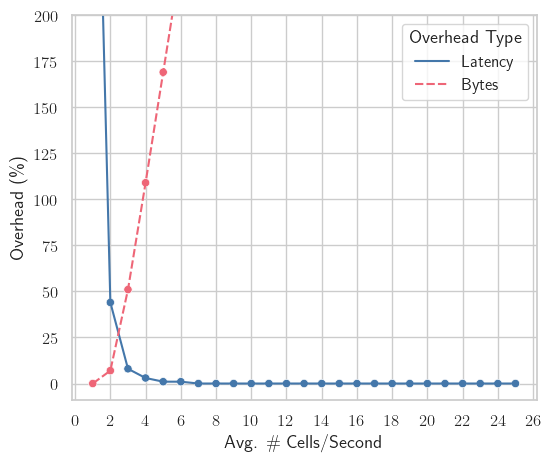

In [57]:
# FULL PLOT, uncomment to generate
"""
oh_loopix_client_plot_scatter = sns.scatterplot(aggregated_overhead_loopix_rt_bytes_client, x="cell_rate", y="overhead_percent", legend=False, hue="Overhead Type")
oh_loopix_client_plot_scatter.set(xlabel='Avg. \# Cells/Second', ylabel='Overhead (\%)')
oh_loopix_client_plot_lines = sns.lineplot(aggregated_overhead_loopix_rt_bytes_client, x="cell_rate", y="overhead_percent", style="Overhead Type", hue="Overhead Type")
oh_loopix_client_plot_lines.yaxis.set_major_locator(ticker.MultipleLocator(100))
oh_loopix_client_plot_lines.yaxis.set_major_formatter(ticker.ScalarFormatter())
oh_loopix_client_plot_lines.xaxis.set_major_locator(ticker.MultipleLocator(2))
oh_loopix_client_plot_lines.xaxis.set_major_formatter(ticker.ScalarFormatter())

(oh_loopix_client_plot_lines.get_figure()).savefig('../../plots/oh_loopix_client_full.pdf')

"""
# ZOOMING IN
plt.ylim([-9,200])
oh_loopix_client_plot_scatter = sns.scatterplot(aggregated_overhead_loopix_rt_bytes_client, x="cell_rate", y="overhead_percent", legend=False, hue="Overhead Type")
oh_loopix_client_plot_scatter.set(xlabel='Avg. \# Cells/Second', ylabel='Overhead (\%)')
oh_loopix_client_plot_lines = sns.lineplot(aggregated_overhead_loopix_rt_bytes_client, x="cell_rate", y="overhead_percent", style="Overhead Type", hue="Overhead Type")
# oh_loopix_client_plot_lines._legend.remove()
# plt.legend(labels = ['Bytes', 'Runtime'], title="Kind")
# plt.show()
oh_loopix_client_plot_lines.yaxis.set_major_locator(ticker.MultipleLocator(25))
oh_loopix_client_plot_lines.yaxis.set_major_formatter(ticker.ScalarFormatter())
oh_loopix_client_plot_lines.xaxis.set_major_locator(ticker.MultipleLocator(2))
oh_loopix_client_plot_lines.xaxis.set_major_formatter(ticker.ScalarFormatter())

(oh_loopix_client_plot_lines.get_figure()).savefig('../../plots/oh_loopix_client_zoom.pdf')

In [58]:
aggregated_overhead_loopix_rt_bytes_server = aggregated_overhead_loopix[(aggregated_overhead_loopix["overhead_type"] == "rt_SERVER") | (aggregated_overhead_loopix["overhead_type"] == "bytes_SERVER")]

In [59]:
aggregated_overhead_loopix_rt_bytes_server = aggregated_overhead_loopix_rt_bytes_server.rename(columns={"overhead_type": "Overhead Type"})

In [60]:
aggregated_overhead_loopix_rt_bytes_server['Overhead Type'] = np.where(aggregated_overhead_loopix_rt_bytes_server['Overhead Type'] == "rt_SERVER", "Latency","Bytes")

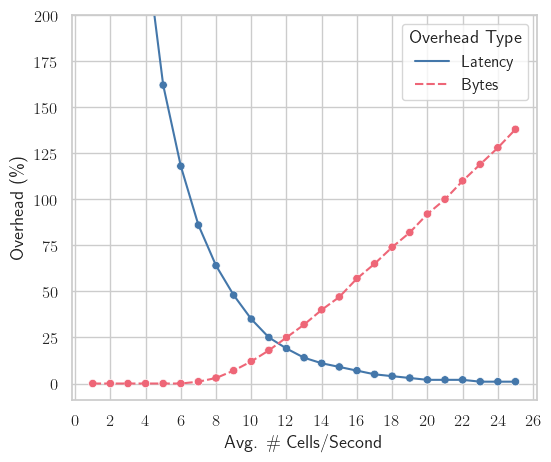

In [61]:
# FULL PLOT, uncomment to generate
"""
oh_loopix_server_plot_scatter = sns.scatterplot(aggregated_overhead_loopix_rt_bytes_server, x="cell_rate", y="overhead_percent", legend=False, hue="Overhead Type")
oh_loopix_server_plot_scatter.set(xlabel='Avg. \# Cells/Second', ylabel='Overhead (\%)')
oh_loopix_server_plot_lines = sns.lineplot(aggregated_overhead_loopix_rt_bytes_server, x="cell_rate", y="overhead_percent", style="Overhead Type", hue="Overhead Type")
oh_loopix_server_plot_lines.yaxis.set_major_locator(ticker.MultipleLocator(250))
oh_loopix_server_plot_lines.yaxis.set_major_formatter(ticker.ScalarFormatter())
oh_loopix_server_plot_lines.xaxis.set_major_locator(ticker.MultipleLocator(2))
oh_loopix_server_plot_lines.xaxis.set_major_formatter(ticker.ScalarFormatter())

(oh_loopix_server_plot_lines.get_figure()).savefig('../../plots/oh_loopix_server_full.pdf')

"""
# ZOOMING IN 
plt.ylim([-9,200])

oh_loopix_server_plot_scatter = sns.scatterplot(aggregated_overhead_loopix_rt_bytes_server, x="cell_rate", y="overhead_percent", legend=False, hue="Overhead Type")
oh_loopix_server_plot_scatter.set(xlabel='Avg. \# Cells/Second', ylabel='Overhead (\%)')
oh_loopix_server_plot_lines = sns.lineplot(aggregated_overhead_loopix_rt_bytes_server, x="cell_rate", y="overhead_percent", style="Overhead Type", hue="Overhead Type")
oh_loopix_server_plot_lines.yaxis.set_major_locator(ticker.MultipleLocator(25))
oh_loopix_server_plot_lines.yaxis.set_major_formatter(ticker.ScalarFormatter())
oh_loopix_server_plot_lines.xaxis.set_major_locator(ticker.MultipleLocator(2))
oh_loopix_server_plot_lines.xaxis.set_major_formatter(ticker.ScalarFormatter())
# plt.legend(labels = ['Bytes', 'Runtime'], title="Kind")

(oh_loopix_server_plot_lines.get_figure()).savefig('../../plots/oh_loopix_server_zoom.pdf')